## **Practical 1**
Write program to demonstrate the following aspects of signal processing on suitable data.
1.	Upsampling and downsampling on Image/speech signal
2.	Fast Fourier Transform to compute DFT


**1) Upsampling and downsampling on Image/speech signal.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2

*    Function to upsample an image


In [1]:
def upsample_image(image, factor):
    return ndimage.zoom(image, factor)

* Function to downsample an image

In [2]:
def downsample_image(image, factor):
    return image[::factor, ::factor]

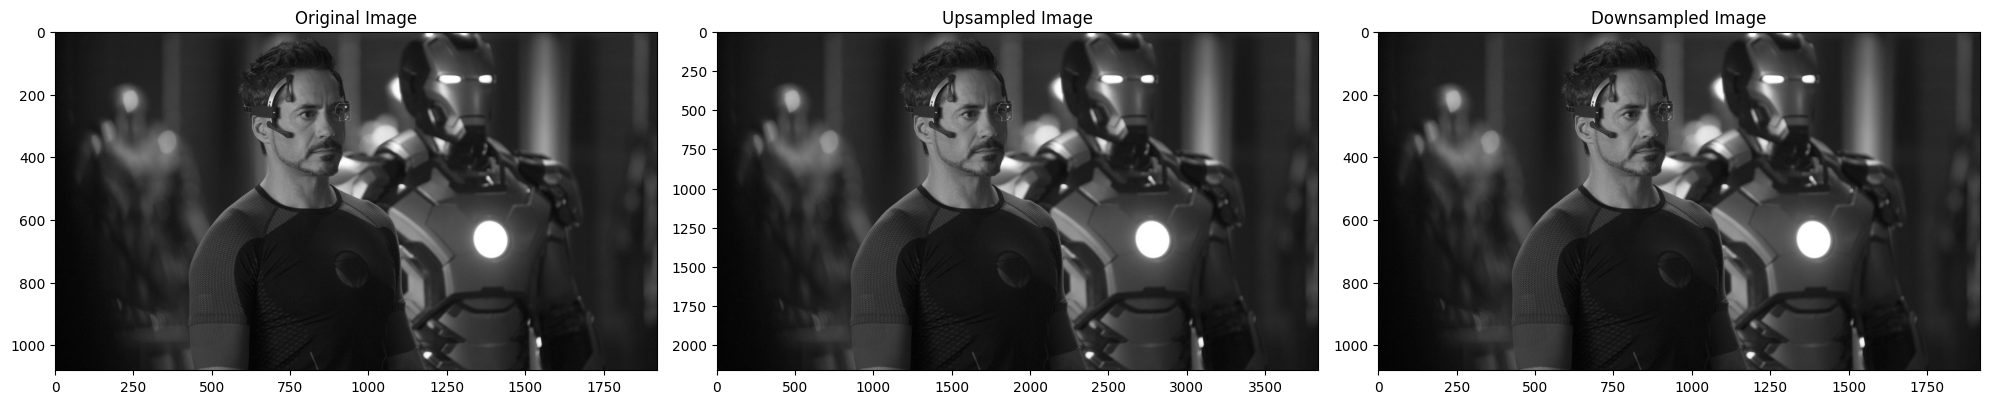

In [ ]:
img_path = "image.png"
original_imge = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
upsampled_imge = upsample_image(original_imge, 2)

downsampled_imge = downsample_image(upsampled_imge, 2)
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(original_imge, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(upsampled_imge, cmap='gray')
plt.title('Upsampled Image')

plt.subplot(1, 3, 3)
plt.imshow(downsampled_imge, cmap='gray')
plt.title('Downsampled Image')

plt.tight_layout()
plt.show()

**2. Fast Fourier Transform to compute DFT.**

In [ ]:
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

* Compute DFT

In [ ]:
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

* Compute magnitude spectrum

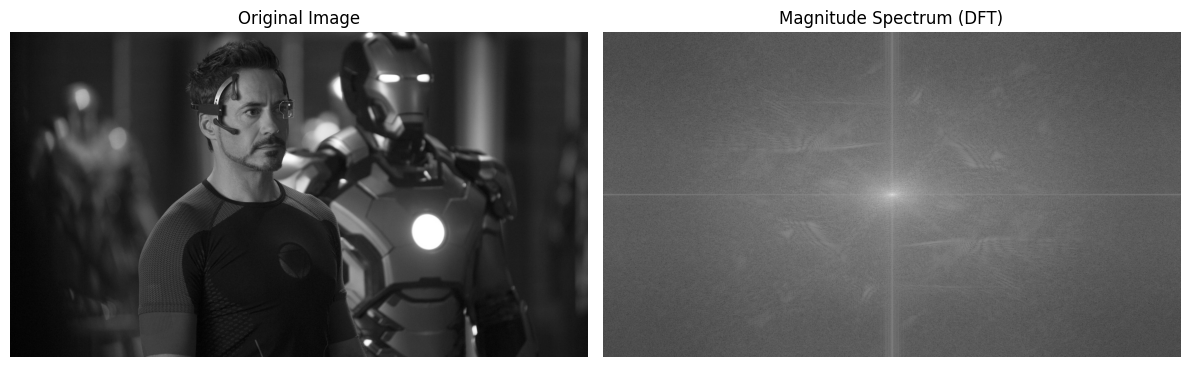

In [ ]:
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (DFT)')
plt.axis('off')

plt.tight_layout()
plt.show()

# **Practical No 2**

Aim: Write program to perform the following on signal
1.	Create a triangle signal and plot a 3-period segment.
2.	For a given signal, plot the segment and compute the correlation between them.


In [ ]:
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2
import numpy as np
from scipy.signal import correlate

Function to create a triangle wave

In [ ]:
def triangle_wave(periods, sampling_rate):
    t = np.linspace(0, periods, int(periods * sampling_rate), endpoint=False)
    return 2 * np.abs((t % 1) - 0.5) - 1

Sampling rate in Hz
Number of periods to plot Generate triangle wave signal


In [ ]:
sampling_rate = 1000
periods = 3

triangle_signal = triangle_wave(periods, sampling_rate)

Plotling the triangle wave

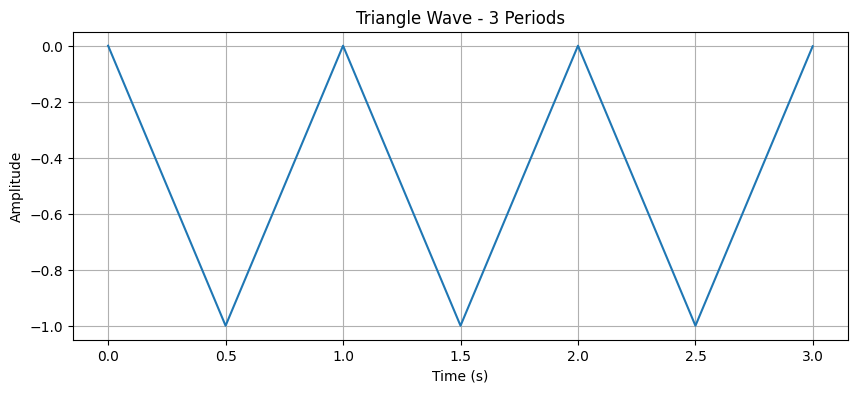

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(np.arange(0, periods, 1/sampling_rate), triangle_signal[:int(periods * sampling_rate)])
plt.title('Triangle Wave - 3 Periods')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Create another signal (e.g., a shifted version of the original signal)

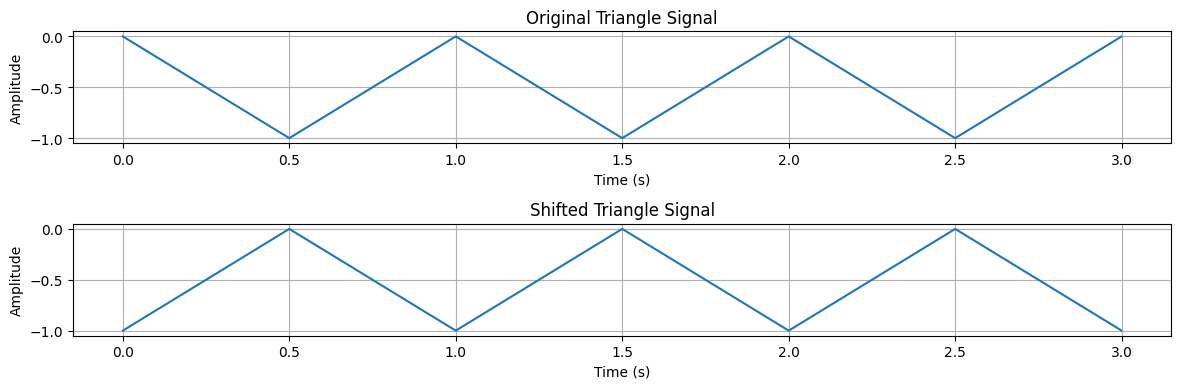

In [ ]:
shifted_triangle_signal = np.roll(triangle_signal, int(sampling_rate / 2))
plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
plt.plot(np.arange(0, periods, 1/sampling_rate), triangle_signal[:int(periods * sampling_rate)])
plt.title('Original Triangle Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(np.arange(0, periods, 1/sampling_rate), shifted_triangle_signal[:int(periods * sampling_rate)])
plt.title('Shifted Triangle Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

Compute the correlation between the original and shifted signals

In [ ]:
correlation_result = correlate(triangle_signal, shifted_triangle_signal, mode='full')

Plotling the correlation result plt.figure(figsize=(12, 4))

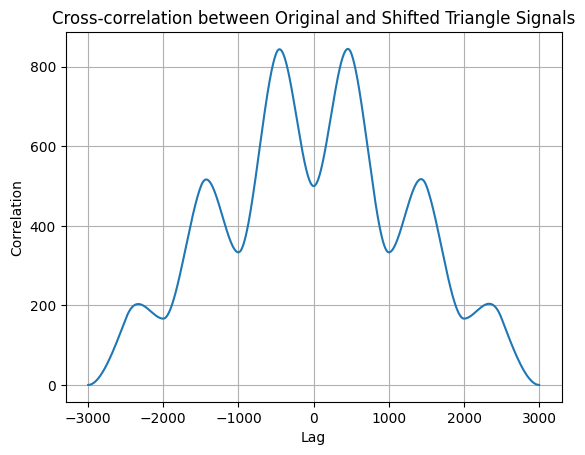

In [ ]:
plt.plot(np.arange(-len(triangle_signal)+1, len(triangle_signal)), correlation_result)
plt.title('Cross-correlation between Original and Shifted Triangle Signals')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

# **Practical No 3**

Write program to demonstrate the following aspects of signal on sound/image data
1. Convolution operation
2. Template Matching

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage



Function to perform convolution operation

In [ ]:
def convolution(image, kernel):
    return cv2.filter2D(image, -1, kernel)

Function to perform template matching

In [ ]:
def template_matching(image, template):
    result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    return result

Load the image and template

In [ ]:
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)


Define a simple edge detection kernel for convolution

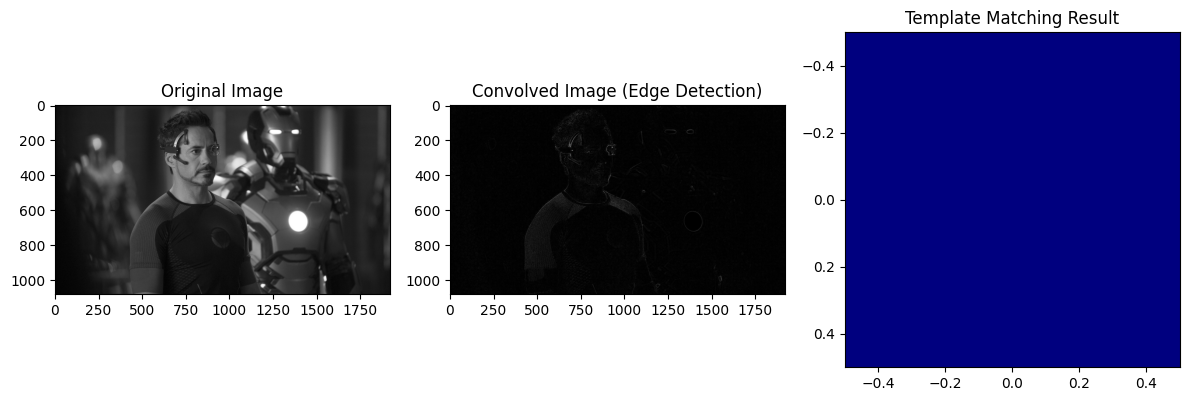

In [ ]:
edge_detection_kernel = np.array([[-1, -1, -1],
[-1, 8, -1],
[-1, -1, -1]], dtype=np.float32)

# Convolution operation with the edge detection kernel
convolved_image = convolution(image, edge_detection_kernel)

# Template Matching
matched_result = template_matching(image, template)

# Display the original image, convolved image, and template matching result
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(convolved_image, cmap='gray')
plt.title('Convolved Image (Edge Detection)')

plt.subplot(133)
plt.imshow(matched_result, cmap='jet') # Use 'jet' colormap for better visibility
plt.title('Template Matching Result')

plt.tight_layout()
plt.show()

# **Practical No 4**

Aim: Write program to implement point/pixel intensity transformations such as:
1. Log and Power-law transformations
2. Contrast adjustments
3. Histogram equalization
4. Thresholding, and halftoning operations

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

**1. Log and Power-law (Gamma) transformations**

In [ ]:
def Log_tranform(img_input,C ):
    Log_image = C * np.log((1 + img_input))
    return Log_image

def power_law_T(img_input,gamma):
    power_law_img = 1 * (img_input**gamma)
    return power_law_img

**2. Contrast adjustment (contrast stretching)**

In [ ]:
def contrast_st(img_input):
    min_val = np.min(img_input)
    max_val = np.max(img_input)
    for i in range(img_input.shape[0]):
        for pix in range(img_input.shape[1]):
            img_input[i][pix] = ((img_input[i][pix] - min_val) / (max_val - min_val)) * 255

    stretched_image = img_input
    return stretched_image

**3. Histogram computation and Histogram equalization**

In [ ]:
def calculate_histrogramgram(image):
    histrogramgram = np.zeros(256, dtype=int)
    for row in range(image.shape[0]):
        for pixel_value in range(image.shape[1]):
            histrogramgram[ image[row][pixel_value] ] += 1
    return histrogramgram

def histrogramgram_equalization(image):
    # Calculate the histrogramgram
    row, col = image.shape
    histrogramgram = calculate_histrogramgram(image)
    # Calculate the cumulative distribution function (CDF)
    pdf = histrogramgram / (row * col)
    cdf = np.cumsum(pdf)

    # Normalize CDF to 0-255
    h_eq = np.round(cdf * 255).astype(np.uint8)
    return h_eq

**4.Thresholding and Halftoning operations**

In [ ]:
def thresolding(image,t : int):
    for i in range(image.shape[0]):
        for pix in range(image.shape[1]):
            if image[i][pix] <= t:
                image[i][pix] = 0
            else:
                image[i][pix] = 255
    return image

In [ ]:
def halftone(image):
    # Define a dithering matrix
    dither_matrix = np.array([[0, 8, 2, 10],
                              [12, 4, 14, 6],
                              [3, 11, 1, 9],
                              [15, 7, 13, 5]])
    # Load the image in grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Initialize halftoned image
    halftoned_image = np.zeros_like(image_gray)
    # Apply halftoning
    for i in range(image_gray.shape[0]):
        for j in range(image_gray.shape[1]):
            if image_gray[i, j] > dither_matrix[i % 4, j % 4]:
                halftoned_image[i, j] = 255
    return halftoned_image

**Display images**

In [ ]:
def display_histograms(hist_org, hist_eq):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(range(256), hist_org)
    plt.title('Histogram of Original Image')
    plt.subplot(1, 2, 2)
    plt.bar(range(256), hist_eq)
    plt.title('Histogram of Histogram Equalized Image')
    plt.show()

In [ ]:
def display_images_only(g_img, log_image, law_img, threshold_img, c_st, halftone_img):
    plt.figure(figsize=(15, 10))
    plt.subplot(3, 4, 1)
    plt.imshow(g_img, cmap='gray')
    plt.title('Gray org Image')
    plt.axis('off')
    plt.subplot(3, 4, 2)
    plt.imshow(log_image, cmap='gray')
    plt.title('Log Image')
    plt.axis('off')
    plt.subplot(3, 4, 3)
    plt.imshow(law_img, cmap='gray')
    plt.title('Law Image')
    plt.axis('off')
    plt.subplot(3, 4, 6)
    plt.imshow(threshold_img, cmap='gray')
    plt.title('Thresholding Image')
    plt.axis('off')
    plt.subplot(3, 4, 7)
    plt.imshow(c_st, cmap='gray')
    plt.title('Contrast Stretched Image')
    plt.axis('off')
    plt.subplot(3, 4, 8)
    plt.imshow(halftone_img, cmap='gray')
    plt.title('Half-toned Image')
    plt.axis('off')
    plt.show()

**Display utility functions**

In [ ]:
img_path = "image.png"
Log_image = Log_tranform(np.array(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)), 1)
power_law_img = power_law_T(np.array(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)), 1.2)
contrast_img = contrast_st(np.array(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)))
histrogram = calculate_histrogramgram(
np.array(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)))
histrogram_eq = histrogramgram_equalization(
np.array(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)))
t_image = thresolding(
np.array(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)), 120)
halftone_img = halftone(
np.array(cv2.imread(img_path, cv2.IMREAD_COLOR)))
org_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

/tmp/ipython-input-1039196134.py:2: RuntimeWarning: divide by zero encountered in log
  Log_image = C * np.log((1 + img_input))


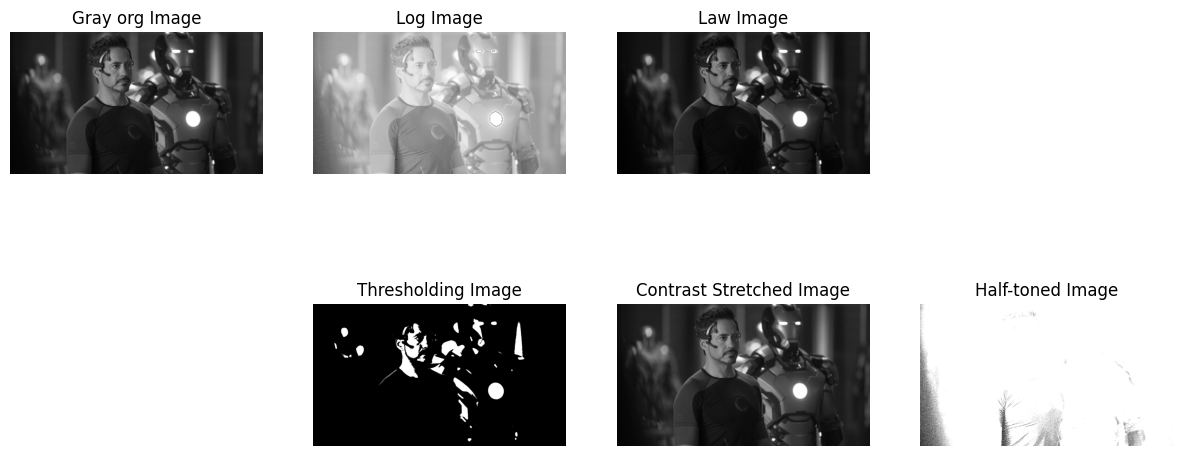

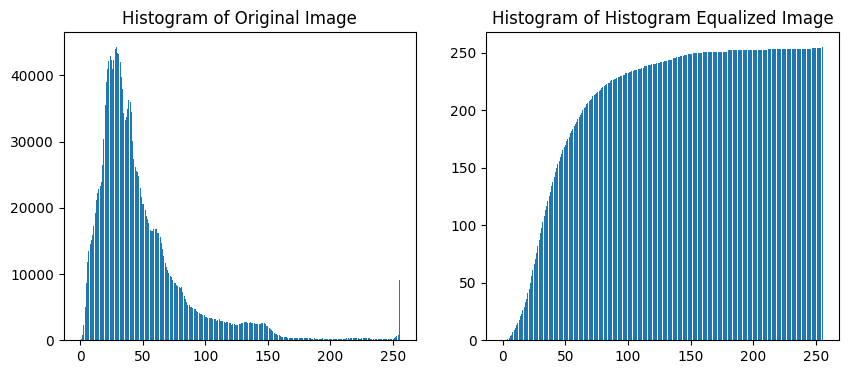

In [ ]:
display_images_only(
org_img,
Log_image,
power_law_img,
t_image,
contrast_img,
halftone_img)
display_histograms(
histrogram,
histrogram_eq
)

# **PRACTICAL NO. 5**

Aim: To apply gradient and Laplacian for image enhancement

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

In [ ]:
# Load an image
image_path = "image3.jpg"
original_imge = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gradient (Sobel) operation
gradient_x = cv2.Sobel(original_imge, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(original_imge, cv2.CV_64F, 0, 1, ksize=3)

# Combine the gradients to get the magnitude and direction
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_direction = np.arctan2(gradient_y,gradient_x)

# Laplacian
laplacian_image = cv2.Laplacian(original_imge, cv2.CV_64F)

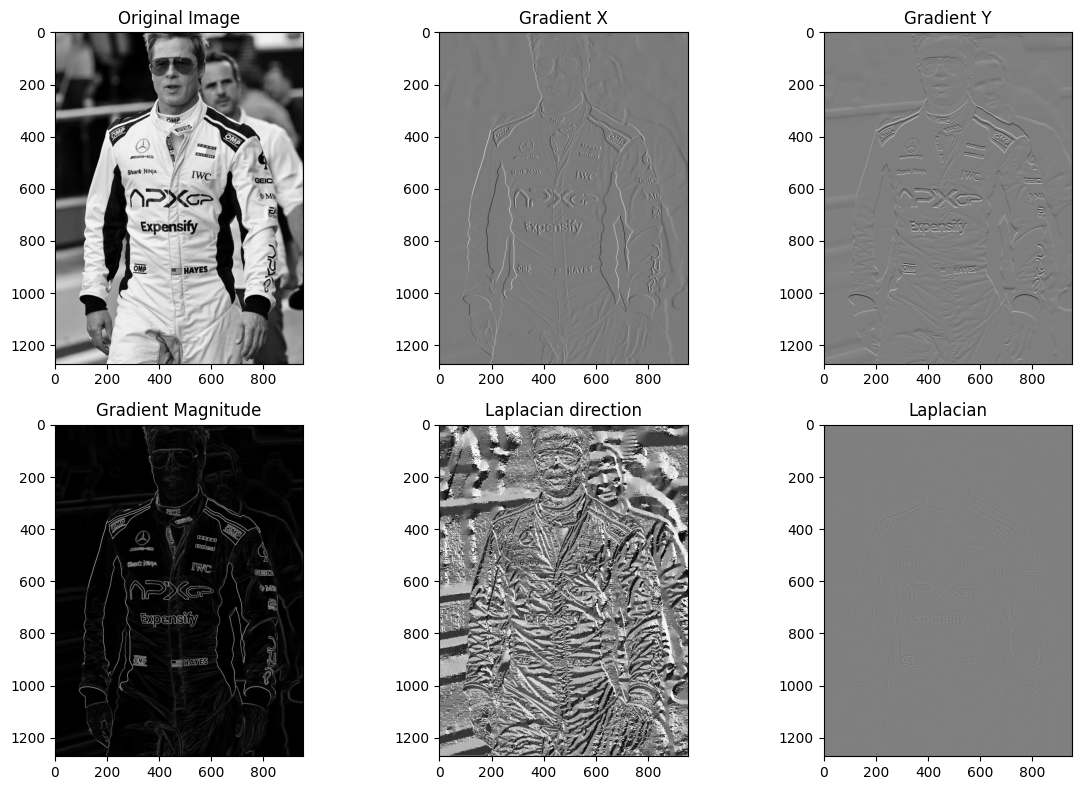

In [ ]:
# Display the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(original_imge, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.title('Gradient X')
plt.subplot(2, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.title('Gradient Y')
plt.subplot(2, 3, 4)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.subplot(2, 3, 5)
plt.imshow(gradient_direction, cmap='gray')
plt.title('Laplacian direction')
plt.subplot(2, 3, 6)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian')
plt.tight_layout()
plt.show()

# **PRACTICAL NO. 6**

 The aim of this program is to demonstrate two common techniques used for noise reduction in
images: linear smoothing and nonlinear smoothing.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

In [ ]:
image_path = 'image.png'
original_imge = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if original_imge is None:
    print("Error: Image not found or could not be loaded.")
    exit()

# Add Gaussian noise to the image
noise = np.random.normal(0, 25, original_imge.shape).astype('uint8')
noisy_image = cv2.add(original_imge, noise)

# Function to apply linear (Gaussian blur) smoothing

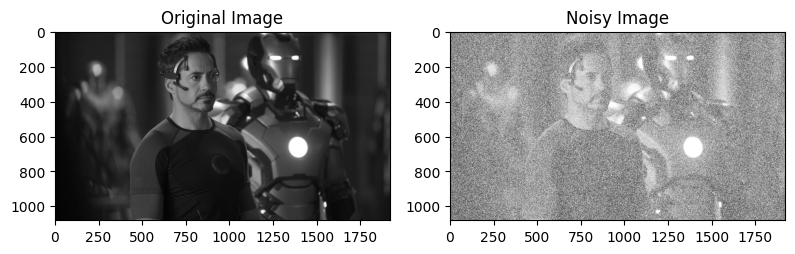

In [ ]:
def linear_smoothing(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# Function to apply nonlinear (median filter) smoothing
def nonlinear_smoothing(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)

# Apply linear smoothing (Gaussian blur)
linear_smoothed_image = linear_smoothing(noisy_image, kernel_size=5)

# Apply nonlinear smoothing (median filter)
nonlinear_smoothed_image = nonlinear_smoothing(noisy_image, kernel_size=5)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(original_imge, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.tight_layout()
plt.show()

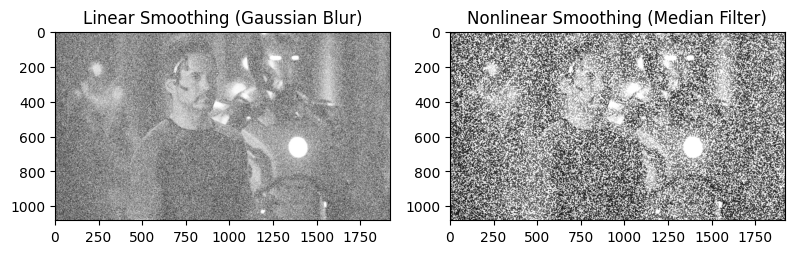

In [ ]:
# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.imshow(linear_smoothed_image, cmap='gray')
plt.title('Linear Smoothing (Gaussian Blur)')
plt.subplot(2, 3, 2)
plt.imshow(nonlinear_smoothed_image, cmap='gray')
plt.title('Nonlinear Smoothing (Median Filter)')
plt.tight_layout()
plt.show()

# **Practical No 7**

Aim: The aim of this program is to demonstrate various image enhancement techniques using image
derivatives, including smoothing, sharpening, and unsharp masking, to generate images suitable for
specific application requirements.

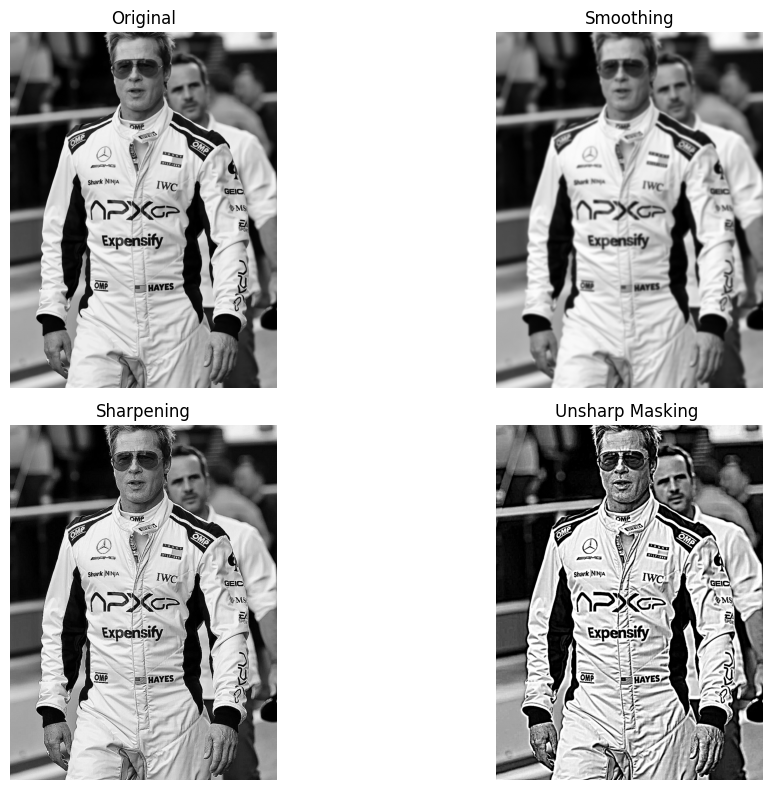

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load image in grayscale
image_path = 'image3.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# -------- FILTER FUNCTIONS --------
def apply_smoothing(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def apply_sharpening(image):
    kernel = np.array([
        [-1, -1, -1],
        [-1,  9, -1],
        [-1, -1, -1]
    ])
    return cv2.filter2D(image, -1, kernel)

def apply_unsharp_masking(image, sigma=4.0, strength=5.0):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    sharpened = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
    return sharpened


# -------- APPLY FILTERS --------
smoothed_image = apply_smoothing(original_image, kernel_size=17)
sharpened_image = apply_sharpening(original_image)
unsharp_masked_image = apply_unsharp_masking(original_image)


# -------- DISPLAY OUTPUT --------
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothing')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpening')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(unsharp_masked_image, cmap='gray')
plt.title('Unsharp Masking ')
plt.axis('off')

plt.tight_layout()
plt.show()

# **Practical No 8**

Write a program to Apply edge detection techniques such as Sobel and Canny to extract
meaningful information from the given image samples

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2


In [ ]:
image_path = 'image3.jpg'
original_imge = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
# Apply Sobel edge detection
sobel_x = cv2.Sobel(original_imge, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(original_imge, cv2.CV_64F, 0, 1, ksize=3)

sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

sobel_direction = np.arctan2(sobel_y,sobel_x)
# Apply Canny edge detection
canny_edges = cv2.Canny(original_imge, 50, 150)

# Display the results
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

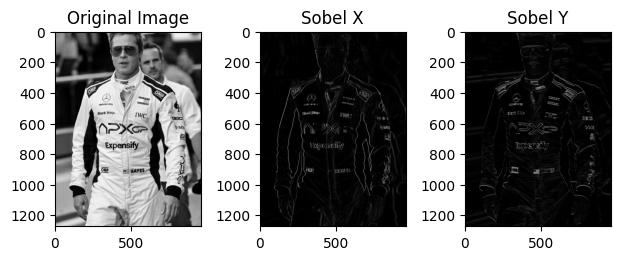

In [ ]:
plt.subplot(2, 3, 1)
plt.imshow(original_imge, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.title('Sobel X')

plt.subplot(2, 3, 3)
plt.imshow(np.abs(sobel_y), cmap='gray')
plt.title('Sobel Y')

plt.tight_layout()
plt.show()

# **Practical No 9**

Write the program to implement various morphological image processing techniques.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2
import os

In [ ]:
image_path = 'image3.jpg'
original_imge = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
image_path = 'image3.jpg'
if not os.path.exists(image_path):
  raise FileNotFoundError(f"File not found: {image_path}")

original_imge = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if original_imge is None:
  raise ValueError("Image failed to load")

def display_images(images, titles):
  plt.figure(figsize=(12, 8))
  for i in range(len(images)):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
  plt.show()

def apply_morphological_operations(image):
  kernel = np.ones((5, 5), np.uint8)
  erosion = cv2.erode(image, kernel, iterations=1)
  dilation = cv2.dilate(image, kernel, iterations=1)
  opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
  closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
  return [image, erosion, dilation, opening, closing]

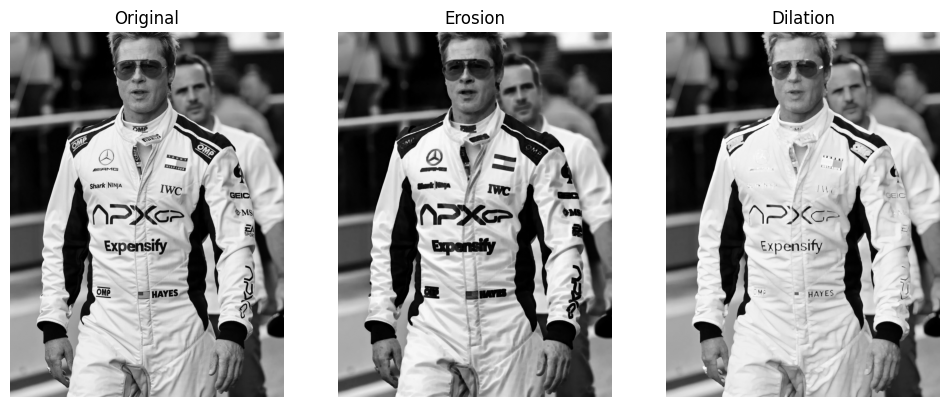

In [ ]:
morph_images = apply_morphological_operations(original_imge)
titles = ["Original", "Erosion", "Dilation", "Opening", "Closing"]
display_images(morph_images[:3], titles[:3])

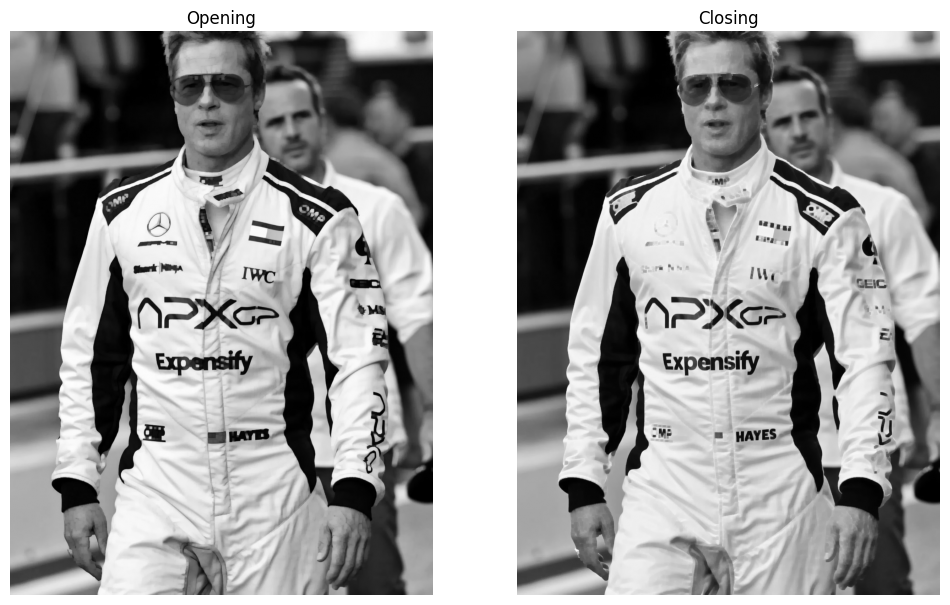

In [ ]:
display_images(morph_images[3:], titles[3:])

# **Practical No 10**

Write the program to extract image features by implementing methods like corner and
blob detectors, HoG and Haar features

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2
import os

In [ ]:
image_path = 'image3.jpg'
original_imge = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

(np.float64(-0.5), np.float64(953.5), np.float64(1271.5), np.float64(-0.5))

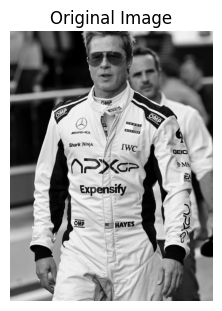

In [ ]:
# Corner Detection
corners = cv2.goodFeaturesToTrack(original_imge, 100, 0.01, 10)
corners = corners.reshape(-1, 2)
corner_image = original_imge.copy()
for corner in corners:
  x, y = corner
  cv2.circle(corner_image, (int(x), int(y)), 5, (0, 255, 0),-1)

# Blob Detection
detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(original_imge)
blob_image = cv2.drawKeypoints(original_imge, keypoints, None, (0, 0, 255),
cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Haar Features (Face Detection)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(original_imge, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
face_image = original_imge.copy()
for (x, y, w, h) in faces:
  cv2.rectangle(face_image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display results using matplotlib
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(original_imge, cmap='gray') # Display as grayscale
plt.title('Original Image')
plt.axis('off')

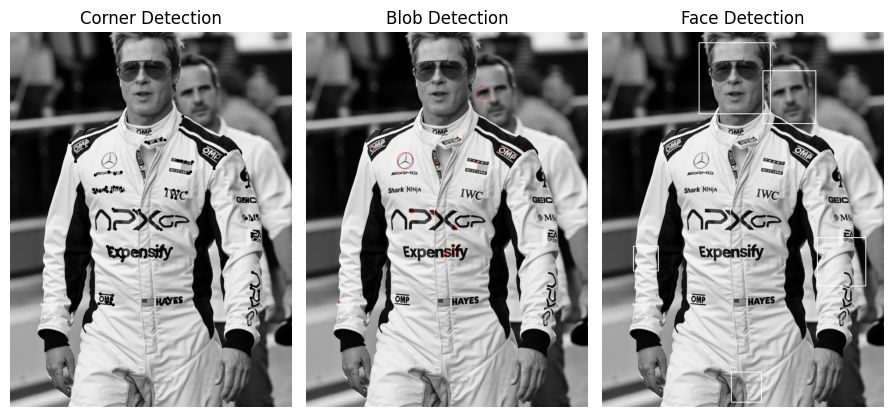

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for colored circle
plt.title('Corner Detection')
plt.axis('off')
# Blob Detection Image
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(blob_image, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for colored keypoints
plt.title('Blob Detection')
plt.axis('off')
# Face Detection Image
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for colored rectangles
plt.title('Face Detection')
plt.axis('off')
plt.tight_layout()
plt.show()

# **Practical No 11**

The aim of this program is to apply segmentation techniques to detect lines, circles, and other shapes/objects in an image using both edge-based and region-based segmentation methods.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2
import os

In [ ]:
image_path = 'image3.jpg'
original_imge = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
def display_images(images, titles):
    plt.figure(figsize=(12, 6))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

In [ ]:
def edge_based_segmentation(image):
    edges = cv2.Canny(image, 50, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)
    lines_image = np.copy(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(lines_image, (x1, y1), (x2, y2), 255, 2)
    return [edges, lines_image], ['Canny Edges', 'Detected Lines']

In [ ]:
def region_based_segmentation(image):
    # Thresholding to create a binary image
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    # Find contours of objects
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
    # Draw contours on a black image
    contour_image = np.zeros_like(image)
    cv2.drawContours(contour_image, contours,-1, 255, 2)
    return [binary_image, contour_image], ['Binary Image', 'Detected Contours']

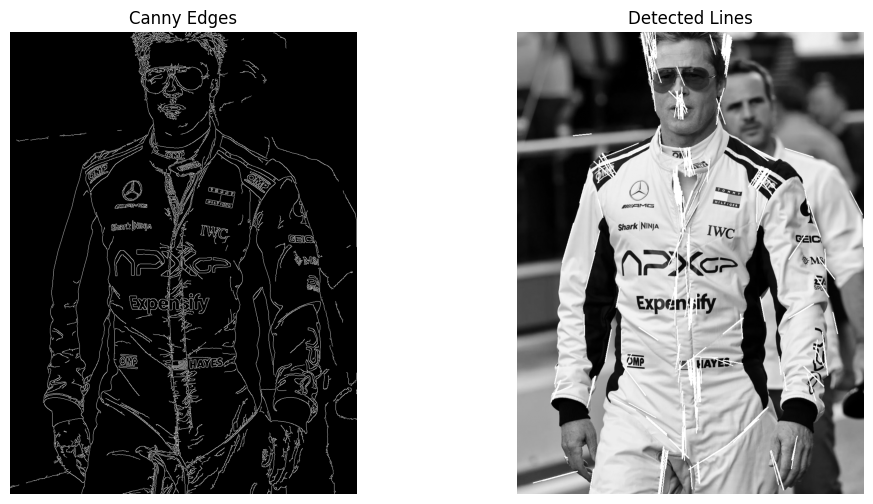

In [ ]:
edge_segmentation_result, edge_segmentation_titles = edge_based_segmentation(original_imge)
# Apply region-based segmentation
region_segmentation_result, region_segmentation_titles = region_based_segmentation(original_imge)
# Display the results
display_images(edge_segmentation_result, edge_segmentation_titles)


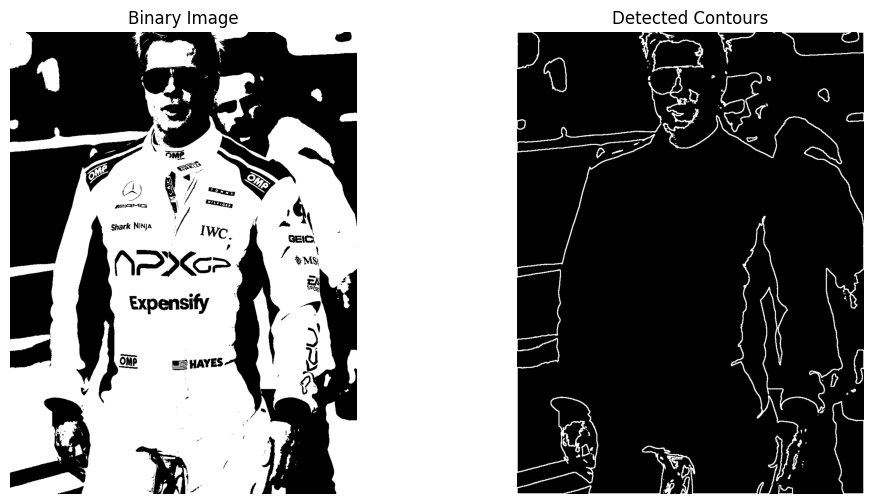

In [ ]:
display_images(region_segmentation_result, region_segmentation_titles)